In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('diabetes.csv')
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [3]:
# shift first col to last
df = df[[*df.columns[1:], df.columns[0]]]
df.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_binary
0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0,0.0
1,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0,0.0
2,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0,0.0
3,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0,0.0
4,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0,0.0


In [4]:
# count null values
df.isnull().sum()

HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
Diabetes_binary         0
dtype: int64

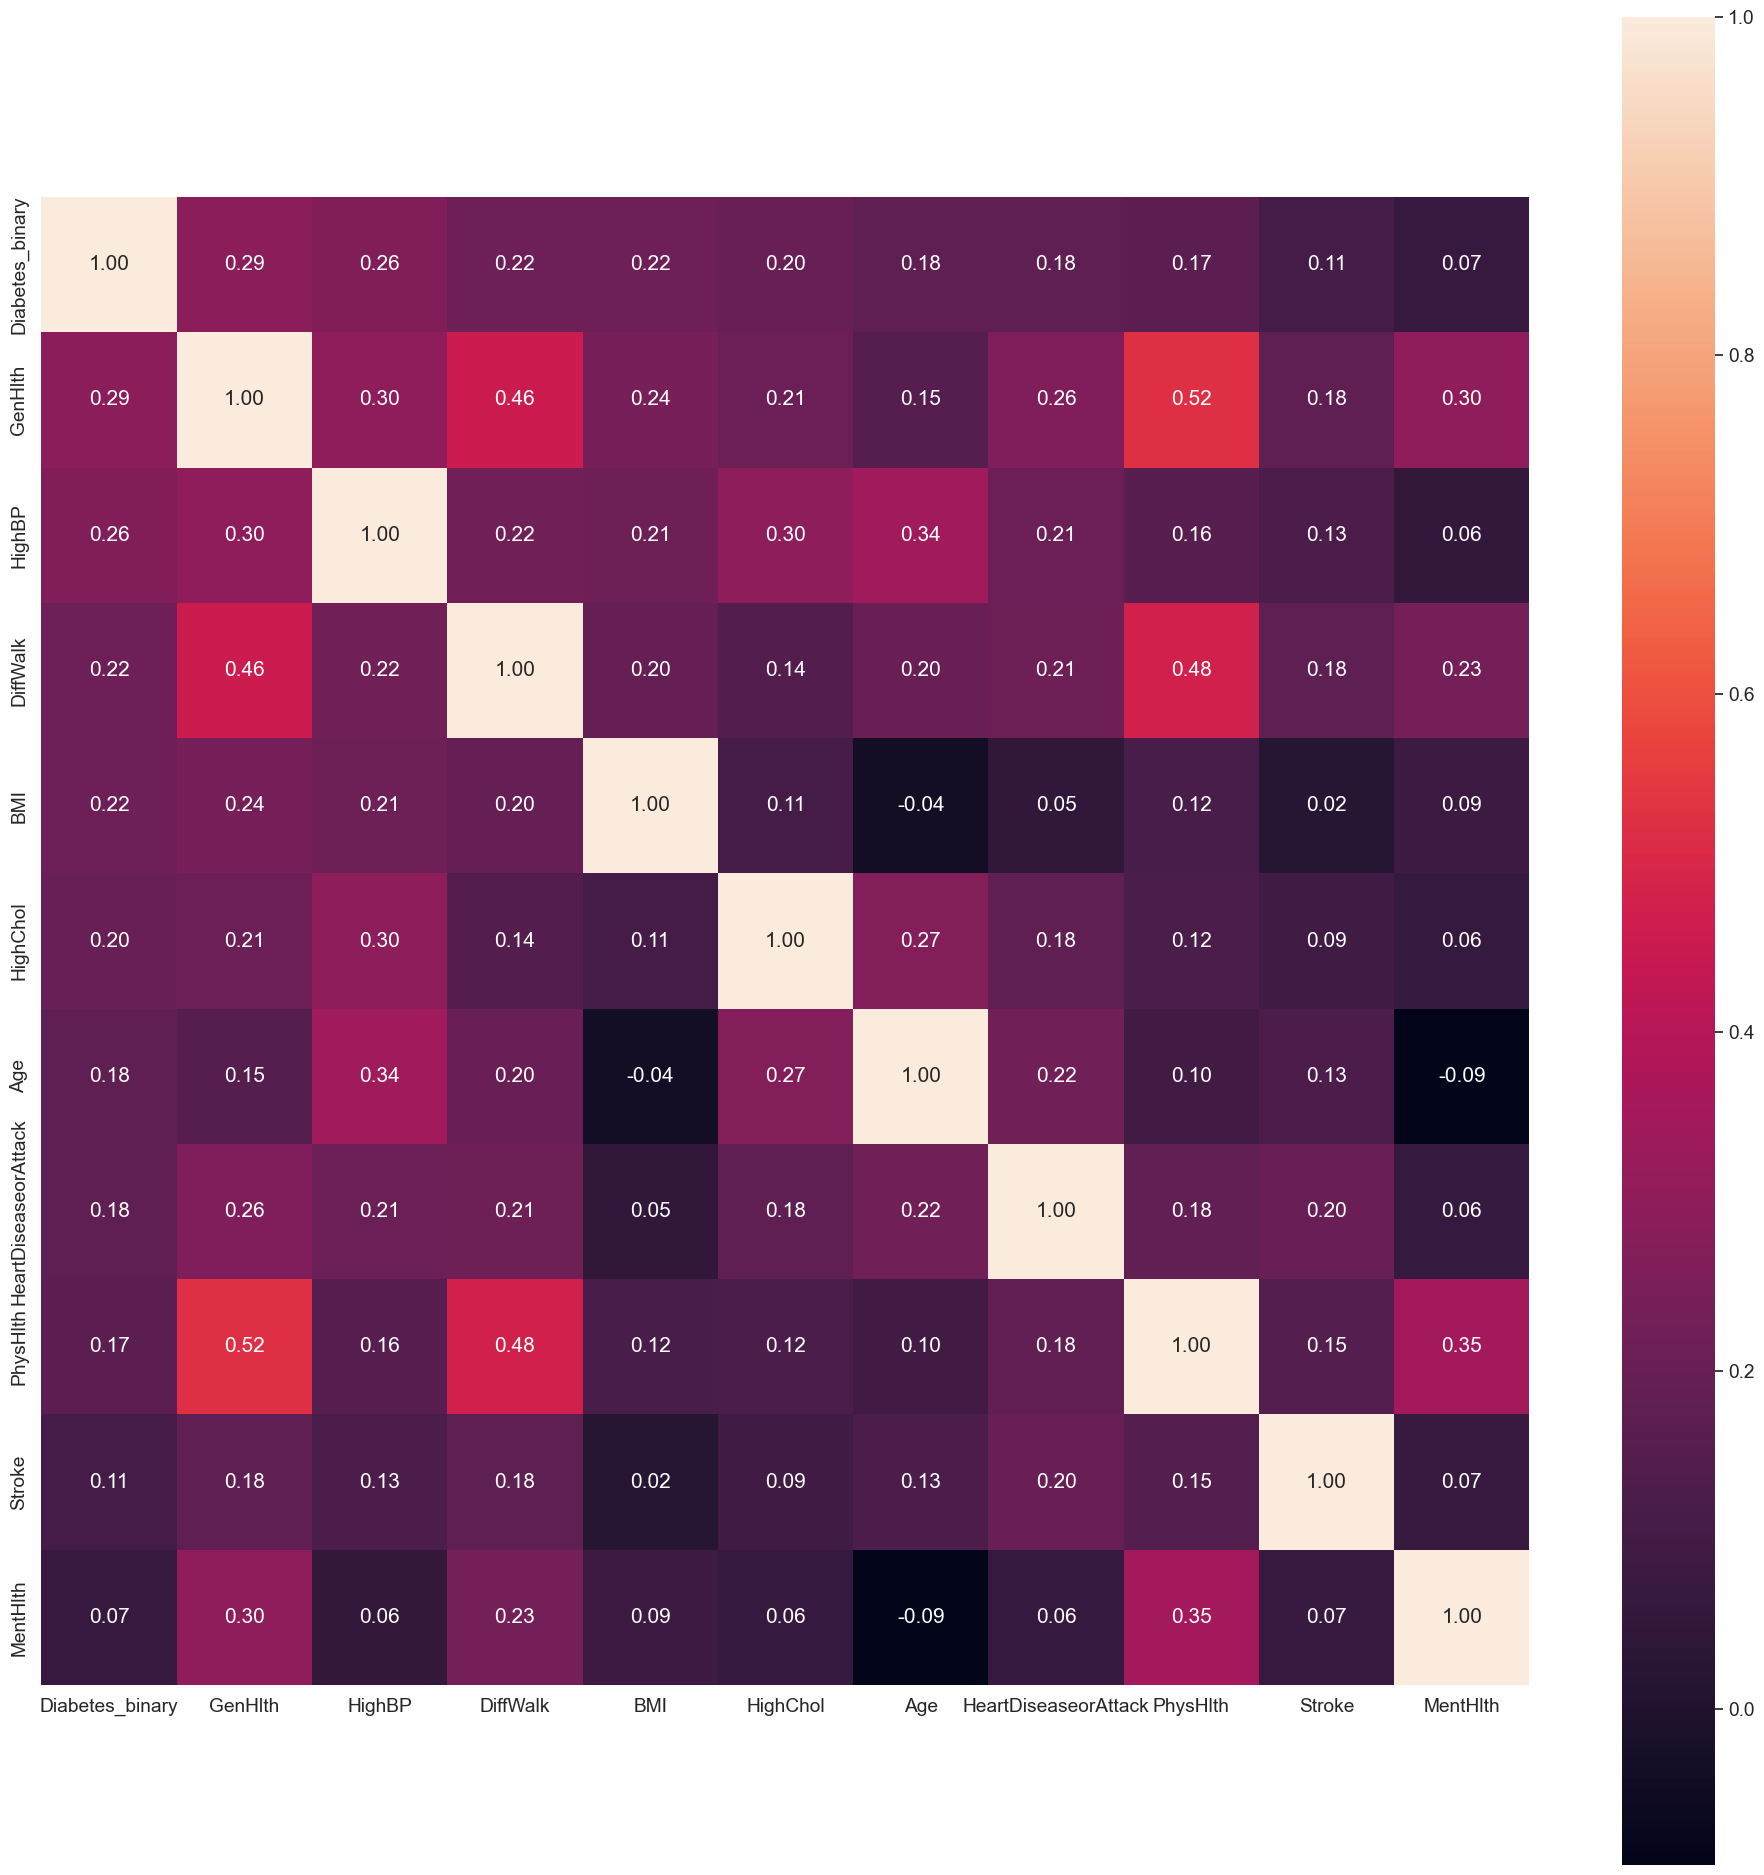

In [5]:
# correlation
k = 11 #number of variables for heatmap
corrmat = df.corr()
cols = corrmat.nlargest(k, 'Diabetes_binary')['Diabetes_binary'].index
cm = np.corrcoef(df[cols].values.T)
plt.figure(figsize=(24,24))
sns.set_theme(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 15}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [15]:
# select effective cols
new_df = df[['GenHlth', 'HighBP', 'DiffWalk', 'BMI', 'HighChol', 'Age', 'HeartDiseaseorAttack', 'PhysHlth', 'Stroke', 'MentHlth', 'Diabetes_binary']]
new_df.head()

,GenHlth,HighBP,DiffWalk,BMI,HighChol,Age,HeartDiseaseorAttack,PhysHlth,Stroke,MentHlth,Diabetes_binary
0,5.0,1.0,1.0,40.0,1.0,9.0,0.0,15.0,0.0,18.0,0.0
1,3.0,0.0,0.0,25.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0
2,5.0,1.0,1.0,28.0,1.0,9.0,0.0,30.0,0.0,30.0,0.0
3,2.0,1.0,0.0,27.0,0.0,11.0,0.0,0.0,0.0,0.0,0.0
4,2.0,1.0,0.0,24.0,1.0,11.0,0.0,0.0,0.0,3.0,0.0


In [7]:
# initialize features titles
features_titles = new_df.columns[1:]
features_titles

Index(['HighBP', 'DiffWalk', 'BMI', 'HighChol', 'Age', 'HeartDiseaseorAttack',
       'PhysHlth', 'Stroke', 'MentHlth', 'Diabetes_binary'],
      dtype='object')

In [8]:
# Split data into X and y 
x = new_df.iloc[:35000, :-1].values
y = new_df.iloc[:35000, -1].values

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

Logistic Regression

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Logistic Regression needs feature scaling
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# Training the model
classifier = LogisticRegression(random_state=1)
classifier.fit(x_train, y_train)

# Checking the Training Accuracy
train_accuracy = classifier.score(x_train, y_train)
print('Training Accuracy:', np.ceil(train_accuracy*100), '%')

# Checking the Testing Accuracy
test_accuracy = classifier.score(x_test, y_test)
print('Testing Accuracy:', np.ceil(test_accuracy*100), '%')

Training Accuracy: 87.0 %
Testing Accuracy: 88.0 %


SVM Classifier

In [13]:
from sklearn.svm import SVC
svm = SVC(kernel = 'rbf', random_state = 0)
svm.fit(x_train, y_train)

# predicting the train set results
train_accuracy = np.ceil(svm.score(x_train,y_train)*100)
print("The Training Accuracy = " ,train_accuracy,"%")

# predicting the test set results
test_accuracy = np.ceil(svm.score(x_test,y_test)*100)
print("The Testing Accuracy = " ,test_accuracy,"%")

The Training Accuracy =  88.0 %
The Testing Accuracy =  88.0 %


Decision Tree Classifier

In [14]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
dtc.fit(x_train, y_train)

# Checking the Training Accuracy
train_accuracy = np.ceil(dtc.score(x_train,y_train)*100)
print("The Training Accuracy = " ,train_accuracy,"%")

# Checking the Testing Accuracy
test_accuracy = np.ceil(dtc.score(x_test,y_test)*100)
print("The Testing Accuracy = " ,test_accuracy,"%")

The Training Accuracy =  97.0 %
The Testing Accuracy =  83.0 %


KNN Classifier

In [16]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors =5, metric = 'minkowski', p = 2)
knn.fit(x_train, y_train)

# predicting the train set results
train_accuracy = np.ceil(knn.score(x_train,y_train)*100)
print("The Training Accuracy = " ,train_accuracy,"%")

# predicting the test set results
test_accuracy = np.ceil(knn.score(x_test,y_test)*100)
print("The Testing Accuracy = " ,test_accuracy,"%")

The Training Accuracy =  90.0 %
The Testing Accuracy =  86.0 %
